# Combient Workshop Exercise, June 22rd 2016

You are given with the file housing.csv containing data about houses sold in the Seattle area. The goal of this exercise is to use Spark to build a model for predicting the sale price of a house based on information such as size, age, area, etc...

You can find help in the Spark documentation https://spark.apache.org/docs/1.6.0/


This example is inspired from the Coursera course (Machine Learning Foundations!)[https://www.coursera.org/learn/ml-foundations/] by University of Washington, and ported to Spark by Combient. 





Create a Spark context

In [1]:
import findspark
findspark.init()
import pyspark
sc = pyspark.SparkContext()   #This line is not needed in some platforms. Comment it out if it causes an error. 
from pyspark.sql import SQLContext
from pyspark.sql.types import *
sqlContext = SQLContext(sc)

The next line tells the notebook that we want all the figures as images inside the notebook.

In [2]:
%matplotlib inline
#%matplotlib notebook #Creates interactive plots

## Importing the data

##### Option 1
Use Pandas to read the file from the local HDD, then push it to Spark. (This will work only for small datasets) 


In [3]:
import pandas as pd
pd_dataframe = pd.read_csv("housing.csv")
pd_dataframe.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
spark_dataframe = sqlContext.createDataFrame(pd_dataframe)
spark_dataframe.printSchema()

root
 |-- id: long (nullable = true)
 |-- date: string (nullable = true)
 |-- price: long (nullable = true)
 |-- bedrooms: long (nullable = true)
 |-- bathrooms: double (nullable = true)
 |-- sqft_living: long (nullable = true)
 |-- sqft_lot: long (nullable = true)
 |-- floors: double (nullable = true)
 |-- waterfront: long (nullable = true)
 |-- view: long (nullable = true)
 |-- condition: long (nullable = true)
 |-- grade: long (nullable = true)
 |-- sqft_above: long (nullable = true)
 |-- sqft_basement: long (nullable = true)
 |-- yr_built: long (nullable = true)
 |-- yr_renovated: long (nullable = true)
 |-- zipcode: long (nullable = true)
 |-- lat: double (nullable = true)
 |-- long: double (nullable = true)
 |-- sqft_living15: long (nullable = true)
 |-- sqft_lot15: long (nullable = true)



##### Option 2
Use SFrame to read the file from the local HDD, then push it to Spark. (This will work for any datasets that fits on the HDD of the local computer.) 


In [5]:
import sframe as sf
sf_sframe = sf.SFrame.read_csv("housing.csv")
sf_sframe.head()

[INFO] sframe.cython.cy_server: SFrame v1.10 started. Logging /tmp/sframe_server_1466367809.log


------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[int,str,int,int,float,int,int,float,int,int,int,int,int,int,int,int,int,float,float,int,int]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Finished parsing file /media/sf_VMShared/tedsds/Workshop_Exercise/housing.csv

Parsing completed. Parsed 21613 lines in 0.047959 secs.

id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view
7129300520,20141013T000000,221900,3,1.0,1180,5650,1.0,0,0
6414100192,20141209T000000,538000,3,2.25,2570,7242,2.0,0,0
5631500400,20150225T000000,180000,2,1.0,770,10000,1.0,0,0
2487200875,20141209T000000,604000,4,3.0,1960,5000,1.0,0,0
1954400510,20150218T000000,510000,3,2.0,1680,8080,1.0,0,0
7237550310,20140512T000000,1225000,4,4.5,5420,101930,1.0,0,0
1321400060,20140627T000000,257500,3,2.25,1715,6819,2.0,0,0
2008000270,20150115T000000,291850,3,1.5,1060,9711,1.0,0,0
2414600126,20150415T000000,229500,3,1.0,1780,7470,1.0,0,0
3793500160,20150312T000000,323000,3,2.5,1890,6560,2.0,0,0


In [6]:
spark_dataframe = sf_sframe.to_spark_dataframe(sc,sqlContext,2) #2 = number of partitions for the dataframe
spark_dataframe.printSchema()

/var/tmp/graphlab-root/8346/45363424-e6b6-4ff5-9aab-aba3060ce0f7
root
 |-- bathrooms: double (nullable = true)
 |-- bedrooms: long (nullable = true)
 |-- condition: long (nullable = true)
 |-- date: string (nullable = true)
 |-- floors: double (nullable = true)
 |-- grade: long (nullable = true)
 |-- id: long (nullable = true)
 |-- lat: double (nullable = true)
 |-- long: double (nullable = true)
 |-- price: long (nullable = true)
 |-- sqft_above: long (nullable = true)
 |-- sqft_basement: long (nullable = true)
 |-- sqft_living: long (nullable = true)
 |-- sqft_living15: long (nullable = true)
 |-- sqft_lot: long (nullable = true)
 |-- sqft_lot15: long (nullable = true)
 |-- view: long (nullable = true)
 |-- waterfront: long (nullable = true)
 |-- yr_built: long (nullable = true)
 |-- yr_renovated: long (nullable = true)
 |-- zipcode: long (nullable = true)



##### Option 3

Read the file from HDFS directly using Spark and [pyspark_csv](https://github.com/seahboonsiew/pyspark-csv). This approach will work for truly big files. **Do not forget to put the file to HDFS first!**

Simply sure the file pyspark_csv.py is in the same directory as the notebook and run the block below.

In [7]:
import pyspark_csv as pycsv
sc.addPyFile('pyspark_csv.py')
plainTextRdd = sc.textFile('/share/housing.csv')
spark_dataframe = pycsv.csvToDataFrame(sqlContext, plainTextRdd, parseDate=False)
spark_dataframe.printSchema()

root
 |-- id: integer (nullable = true)
 |-- date: string (nullable = true)
 |-- price: integer (nullable = true)
 |-- bedrooms: integer (nullable = true)
 |-- bathrooms: double (nullable = true)
 |-- sqft_living: integer (nullable = true)
 |-- sqft_lot: integer (nullable = true)
 |-- floors: double (nullable = true)
 |-- waterfront: integer (nullable = true)
 |-- view: integer (nullable = true)
 |-- condition: integer (nullable = true)
 |-- grade: integer (nullable = true)
 |-- sqft_above: integer (nullable = true)
 |-- sqft_basement: integer (nullable = true)
 |-- yr_built: integer (nullable = true)
 |-- yr_renovated: integer (nullable = true)
 |-- zipcode: integer (nullable = true)
 |-- lat: double (nullable = true)
 |-- long: double (nullable = true)
 |-- sqft_living15: integer (nullable = true)
 |-- sqft_lot15: integer (nullable = true)



##### Option 4 [Will not work on the VM supplied]
Read the file from HDFS directly using Spark and spark-csv, similarly to what we did in Scala for the NASA prototype.

This is still work in progress on the VM we are using today ;)

In [8]:
#spark_dataframe = sqlContext.read.format('com.databricks.spark.csv').option('header', 'true').option('inferschema', 'true').load('housing.csv')

## Data exploration

Let's start by plotting the relation between the size of the house ("sqft_living") and the price.

Get a list of prices and sqft_living from Spark

In [9]:
prices_sqftliving = spark_dataframe.select("price","sqft_living").sample(False,0.1).toPandas()

What have we just done here ???

Now, make a scatter plot using,with Pandas ( http://pandas.pydata.org/pandas-docs/version/0.15.0/visualization.html#scatter-plot )  or Seaborn (https://web.stanford.edu/~mwaskom/software/seaborn/generated/seaborn.jointplot.html#seaborn.jointplot)

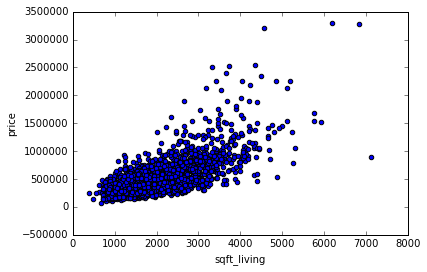

In [10]:
prices_sqftliving.plot(kind='scatter', x='sqft_living', y='price')

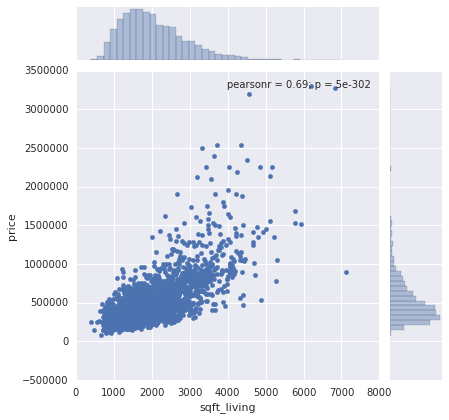

In [11]:
import seaborn as sns
sns.jointplot(x="sqft_living",y="price",data=prices_sqftliving)

Let's do the same for, lot size, number of bathroom, construction year and latitude

In [12]:
prices_others = spark_dataframe.select("price","sqft_living","sqft_lot","yr_built","lat","bathrooms").toPandas()

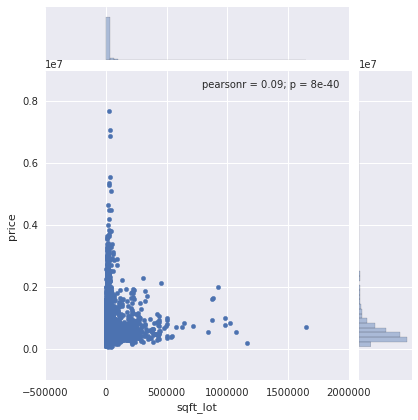

In [13]:
sns.jointplot(x="sqft_lot",y="price",data=prices_others)

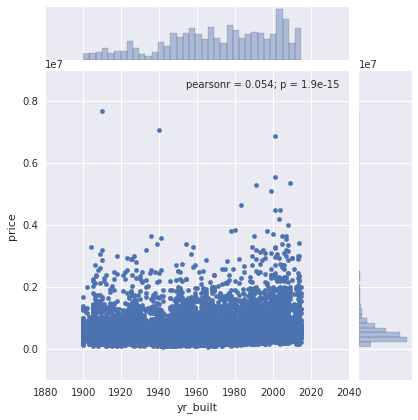

In [14]:
sns.jointplot(x="yr_built",y="price",data=prices_others)

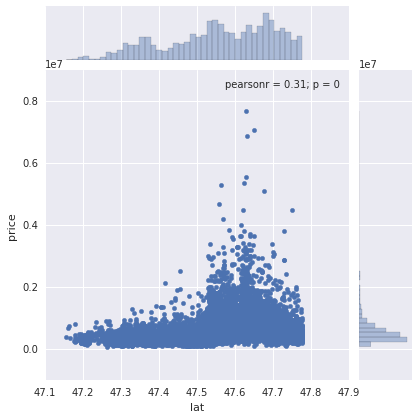

In [15]:
sns.jointplot(x="lat",y="price",data=prices_others)

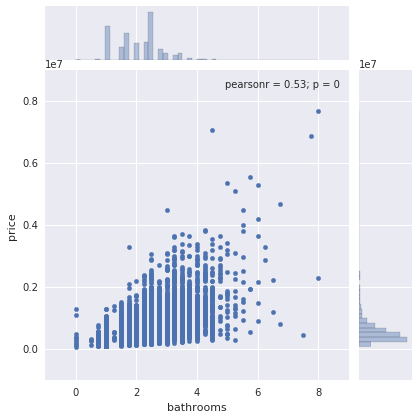

In [16]:
sns.jointplot(x="bathrooms",y="price",data=prices_others)

NB: In this dataset, bathrooms with a bath tub are counted as 1, bathrooms with only a shower are counted as 0.5 and those with only a toilet and sink are counted as 0.25. It is thus normal to see non-integer numbers of bathrooms!

## Split the data into train and validation

We split the data into training and test set. From now on, **you cannot touch the test set until the very end of the exercise!**

In [17]:
(spark_DF_train,spark_DF_test) = spark_dataframe.randomSplit([0.8,0.2])

# Simple linear regression

Below, you are asked to perform a linear regression to predict the price from the living area.
We will provide guidlines for Spark.mlib (the "old way" in Spark, using RDD) and Spark.ml (the "new way", using dataframes)


### Spark.mlib

https://spark.apache.org/docs/1.6.0/mllib-linear-methods.html#linear-least-squares-lasso-and-ridge-regression



In [18]:
from pyspark.mllib.regression import LabeledPoint, LinearRegressionWithSGD, LinearRegressionModel

#Select the variables needed for the regression
spark_DF_price_sqftliv = spark_DF_train.select("price","sqft_living")

Models in Spark.mlib take as input an RDD of LabeledPoints. A LabeledPoint is in turn a tuples of type (float, Vector[float]). The next lines maps the Dataframe create above into a suitable RDD.

In [ ]:
spark_RDD_price_sqftliv = spark_DF_price_sqftliv.map( lambda x : LabeledPoint(float(x.price),[ float(x.sqft_living)] ))
spark_RDD_price_sqftliv.collect()[:10]

[LabeledPoint(221900.0, [1180.0]),
 LabeledPoint(538000.0, [2570.0]),
 LabeledPoint(180000.0, [770.0]),
 LabeledPoint(604000.0, [1960.0]),
 LabeledPoint(1225000.0, [5420.0]),
 LabeledPoint(257500.0, [1715.0]),
 LabeledPoint(291850.0, [1060.0]),
 LabeledPoint(229500.0, [1780.0]),
 LabeledPoint(323000.0, [1890.0]),
 LabeledPoint(662500.0, [3560.0])]

Learn the model

In [ ]:
model = LinearRegressionWithSGD.train(spark_RDD_price_sqftliv,intercept=True,iterations=1000,step=0.0000001)

View the model parameters

In [ ]:
print model.weights
print model.intercept

Now, jump to Model evaluation / Spark.mlib section

### Spark.ml

This is similar to what we did in the Santander Bank's problem.

http://spark.apache.org/docs/latest/ml-classification-regression.html#linear-regression



Create a list of columns to be used as features

In [ ]:
FeaturesCol = ["sqft_living"]

In [ ]:
from pyspark.ml.feature import VectorAssembler
from pyspark.ml import Pipeline
from pyspark.ml.regression import LinearRegression


#Assemble selected features into a vector in a column called "features"
vectorAssembler = VectorAssembler(
    inputCols=FeaturesCol,
    outputCol="features")


#class pyspark.ml.regression.LinearRegression(self, featuresCol="features", labelCol="label", predictionCol="prediction", maxIter=100, regParam=0.0, elasticNetParam=0.0, tol=1e-6, fitIntercept=True, standardization=True, solver="auto", weightCol=None)[source]
lr = LinearRegression(featuresCol="features", labelCol="price_float", predictionCol="prediction", maxIter=100)

modelPipeline = Pipeline(stages=[vectorAssembler,LinearRegression])

In [ ]:
from pyspark.sql.types import DoubleType

Pipe_model = modelPipeline.fit(spark_DF_train.withColumn("price_float",spark_DF_train["price"].cast(DoubleType())))

In [ ]:
train_with_predictions = Pipe_model.transform(spark_DF_train.withColumn("price_float",spark_DF_train["price"].cast(DoubleType())))

In [ ]:
train_with_predictions.head()

In [ ]:
MSE = train_with_predictions.map(lambda x: (x.prediction-x.price)**2).mean()
from math import sqrt
print "sqrt(MSE) : %f" %sqrt(MSE)

# Evaluating the model


Is this number reasonable ? Calculate the mean price/sqft! Does it look reasonable or completely off ? 

In [ ]:
spark_DF_price_sqftliv.map(lambda x: float(x.price)/x.sqft_living).mean()

A linear regression of one variable is simply a line! Can you plot it on the figure to get a feeling of how good the model is ? 

In [ ]:
g = sns.jointplot(x="sqft_living",y="price",data=prices_sqftliving,size=12)
g.ax_joint.plot([0,9000],[model.intercept,model.intercept+model.weights[0]*9000],'--r')

Predict the house price and calculate the mean squared error (MSE), first on the training data: 

In [ ]:
#Transform the RDD from (price,features) to (price,prediction)
spark_RDD_price_prediction = spark_RDD_price_sqftliv.map(lambda x: (x.label,model.predict(x.features)))
spark_RDD_price_prediction.collect()[:10]   #Transform to a list and display        

In [ ]:
#Calculate the square error for each prediction
spark_RDD_Error = spark_RDD_price_prediction.map(lambda x: (x[0]-x[1])**2) 

from math import sqrt
print "sqrt(MSE) : %f" %sqrt(spark_RDD_Error.mean())

Do the same on the test data!

In [ ]:
spark_DF_price_sqftliv_test = spark_DF_test.select("price","sqft_living")
spark_RDD_price_sqftliv_test = spark_DF_price_sqftliv_test.map( lambda x : LabeledPoint(float(x.price),[ float(x.sqft_living)] ))
spark_RDD_price_prediction_test = spark_RDD_price_sqftliv_test.map(lambda x: (x.label,model.predict(x.features)))
spark_RDD_Error_test= spark_RDD_price_prediction_test.map(lambda x: (x[0]-x[1])**2) 

print "sqrt(MSE) : %f" %sqrt(spark_RDD_Error_test.mean())

# Multivariate regression

Choose two (or more) new variables and add them to the linear model to improve your predictions.

Please note that when using variables with values in different orders of magnitude, you will need to scale normalize the data before learning the model using a scaler model:  http://spark.apache.org/docs/latest/api/python/pyspark.mllib.html#pyspark.mllib.feature.StandardScalerModel


If you use categorical variables as features, theses need to be indexed. An example can be founded in section 4 here: https://github.com/waichee/pyspark-ipython-notebook/blob/856b45eb17b2243bc08d3842659c6b44892256fa/spark-pyspark-mllib-101.ipynb



In [ ]:
##Guidelines for using a scaler: 

#Extract features and labels
#features = YOUR_LABELED_POINT_RDD.map(lambda x: x.features)
#label = YOUR_LABELED_POINT_RDD.map(lambda x: x.label)

#Create a scaler model and fit it on your data
#scaler_model= StandardScaler(True, True).fit(features)

#Scale the data
#scaled_features = scaler_model.transform(features)

#>Re-assemble the label and features in a LabeledPoint RDD
#YOUR_LABELED_POINT_RDD_withScaler = label.zip(scaler_model.transform(features)).map(lambda x: LabeledPoint(x[0],x[1]))

In [ ]:
#Example with number or bedrooms and bathrooms

spark_DF_price = spark_DF_train.select("price","sqft_living","bedrooms","bathrooms")
spark_RDD_price = spark_DF_price.map( lambda x : LabeledPoint(float(x.price),[float(x.bedrooms) ,float(x.bathrooms),float(x.sqft_living)] ))


features = spark_RDD_price.map(lambda x: x.features)
label = spark_RDD_price.map(lambda x: x.label)

normfactors = features.mean()
normfeatures = features.map(lambda x: x/normfactors)


spark_RDD_price = label.zip(normfeatures).map(lambda x: LabeledPoint(x[0],x[1]))
spark_RDD_price.collect()

In [ ]:
model_multi = LinearRegressionWithSGD.train(spark_RDD_price,intercept=True,iterations=1000,step=0.001)
print model_multi.weights
print model_multi.intercept

In [ ]:
#Transform the RDD from (price,features) to (price,prediction)
spark_RDD_price_prediction = spark_RDD_price.map(lambda x: (x.label,model_multi.predict(x.features)))
spark_RDD_price_prediction.collect()   #Transform to a list and display    

In [ ]:
#Calculate the square error for each prediction
spark_RDD_Error = spark_RDD_price_prediction.map(lambda x: (x[0]-x[1])**2) 

from math import sqrt
print "sqrt(MSE) : %f" %sqrt(spark_RDD_Error.mean())